<a href="https://colab.research.google.com/github/lucianozablocki/tiny_md/blob/main/cp_lab1_lab2_lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# lab 1 y 2

In [ ]:
path="/content/20250325T182411.csv"

In [ ]:
# df = pd.read_csv("https://raw.githubusercontent.com/lucianozablocki/tiny_md/refs/heads/main/results/20250322T164930.csv")
df = pd.read_csv(path)

In [ ]:
df

,particulas/s,N,opt,compiler,runs
0,171.061,4,-O0,gcc,20
1,191.373,4,-O0,gcc,20
2,196.257,4,-O0,gcc,20
3,199.468,4,-O0,gcc,20
4,201.115,4,-O0,gcc,20
...,...,...,...,...,...
515,34.987,256,-Ofast,clang,5
516,35.363,256,-Ofast,clang,5
517,35.130,256,-Ofast,clang,5
518,21.440,500,-Ofast,clang,2


In [ ]:
print(f"Length of original df: {len(df)}")
print("\nUnique values in each column:")
print(f"N values: {df['N'].unique()}")
print(f"opt flags: {df['opt'].unique()}")
print(f"compilers: {df['compiler'].unique()}")

Length of original df: 520

Unique values in each column:
N values: [  4  32 108 256 500]
opt flags: ['-O0' '-O1' '-O2' '-O3' '-Ofast']
compilers: ['gcc' 'clang']


In [ ]:
print(20*(5*2)+15*(5*2)+10*(5*2)+5*(5*2)+2*(5*2))

520


In [ ]:
# Create a cross product of all possible combinations
compilers = ['gcc', 'clang']
opt_flags = ['-O0', '-O1', '-O2', '-O3', '-Ofast']
Ns = [4*m**3 for m in range(1,5+1)]  # [4, 32, 108, 256, 500]

# Create all possible combinations
all_combinations = pd.MultiIndex.from_product(
    [Ns, opt_flags, compilers],
    names=['N', 'opt', 'compiler']
).to_frame(index=False)

# Count measurements for each combination
counts = df.groupby(['N', 'opt', 'compiler']).size().reset_index(name='count')

# Merge to see which combinations have fewer than 5 measurements
analysis = all_combinations.merge(counts, how='left', on=['N', 'opt', 'compiler'])

# Print summary statistics
print("\nSummary:")
print(f"Total rows in df: {len(df)}")
print("\nMeasurement counts:")
print(analysis['count'].value_counts())


Summary:
Total rows in df: 520

Measurement counts:
count
20    10
15    10
10    10
5     10
2     10
Name: count, dtype: int64


In [ ]:
df_max = df.groupby(['N', 'opt', 'compiler'])['particulas/s'].max().reset_index()

In [ ]:
df_max

,N,opt,compiler,particulas/s
0,4,-O0,clang,172.684
1,4,-O0,gcc,211.368
2,4,-O1,clang,448.648
3,4,-O1,gcc,374.810
4,4,-O2,clang,562.937
5,4,-O2,gcc,542.001
6,4,-O3,clang,419.775
7,4,-O3,gcc,527.602
8,4,-Ofast,clang,578.933
9,4,-Ofast,gcc,572.200


In [ ]:
df=df_max

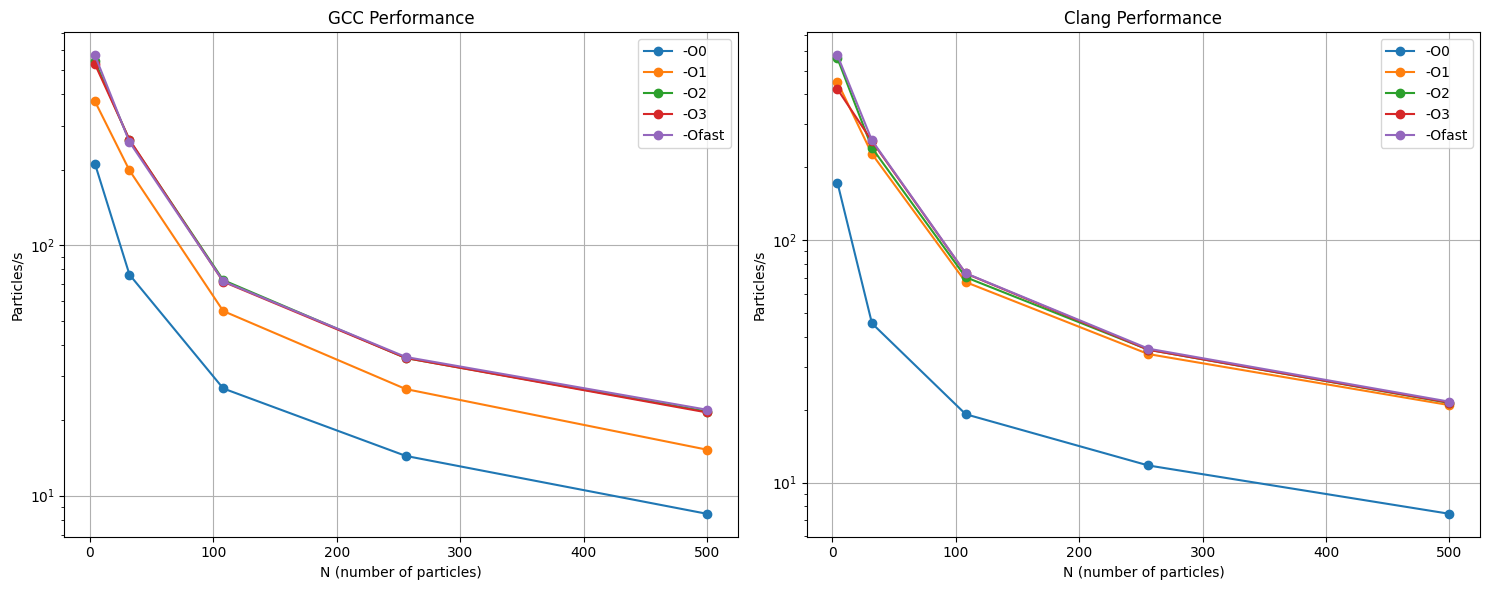

In [ ]:
plt.figure(figsize=(15, 6))

# Plot for GCC
plt.subplot(1, 2, 1)
for opt in df['opt'].unique():
    data = df[(df['compiler'] == 'gcc') & (df['opt'] == opt)]
    plt.plot(data['N'], data['particulas/s'], 'o-', label=opt)

plt.title('GCC Performance')
plt.xlabel('N (number of particles)')
plt.ylabel('Particles/s')
plt.yscale('log')
plt.legend()
plt.grid(True)

# Plot for Clang
plt.subplot(1, 2, 2)
for opt in df['opt'].unique():
    data = df[(df['compiler'] == 'clang') & (df['opt'] == opt)]
    plt.plot(data['N'], data['particulas/s'], 'o-', label=opt)

plt.title('Clang Performance')
plt.xlabel('N (number of particles)')
plt.ylabel('Particles/s')
plt.yscale('log')
plt.legend()
plt.grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def compare_perf(baseline, improved, metric):

  # Load the two CSV files
  df1 = pd.read_csv(baseline)
  df2 = pd.read_csv(improved)

  # max particulas/s for each (N, compiler)
  max_df1 = df1.groupby(['N', 'compiler'])[metric].max().reset_index()
  max_df2 = df2.groupby(['N', 'compiler'])[metric].max().reset_index()

  # Merge the two DataFrames to align the same (N, compiler) pairs
  merged = pd.merge(
      max_df1,
      max_df2,
      on=['N', 'compiler'],
      suffixes=('_1', '_2')
  )

  # Compute the ratio (N2 / N1)
  merged['ratio'] = merged[f'{metric}_2'] / merged[f'{metric}_1']

  # Print the results
  merged[['N', 'compiler', f'{metric}_1', f'{metric}_2', 'ratio']]
  return merged


In [ ]:
tp1improve_vs_tp2vec = compare_perf(
  'https://raw.githubusercontent.com/lucianozablocki/tiny_md/refs/heads/main/results/atom-mtwister.csv',
  'https://raw.githubusercontent.com/lucianozablocki/tiny_md/refs/heads/main/results/atom-vectorized.csv'
)

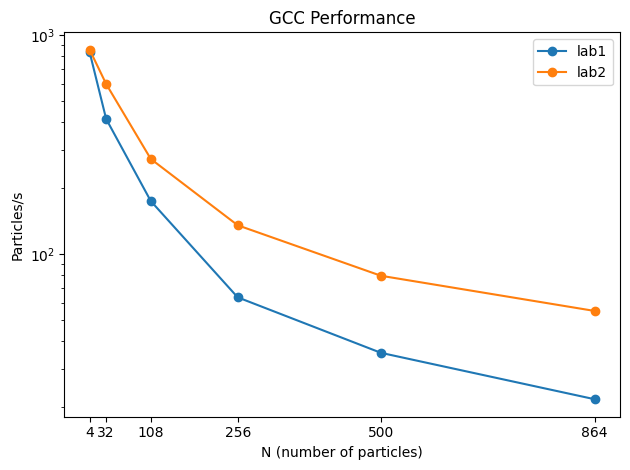

In [ ]:

plt.plot([4, 32,108, 256, 500, 864],tp1improve_vs_tp2vec[tp1improve_vs_tp2vec['compiler']=='gcc']['particulas/s_1'], 'o-', label='lab1')
plt.plot([4, 32,108, 256, 500, 864],tp1improve_vs_tp2vec[tp1improve_vs_tp2vec['compiler']=='gcc']['particulas/s_2'], 'o-', label='lab2')
plt.legend()

plt.title('GCC Performance')
plt.xlabel('N (number of particles)')
plt.xticks([4, 32,108, 256, 500, 864])
plt.ylabel('Particles/s')
plt.yscale('log')
# plt.grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()


In [ ]:
import numpy as np

def highlight_rows(row):
    if row['compiler'] == 'gcc':
        return ['background-color: darkgray; color: black; font-weight: bold'] * len(row)
    else:
        return ['background-color: lightgray; color: black'] * len(row)
a=tp1improve_vs_tp2vec.rename(columns={"particulas/s_1": "particulas/s lab1", "particulas/s_2": "particulas/s lab2"})
styled_df=a.style.apply(highlight_rows, axis=1)
styled_df.format(subset=[a.columns[4]], formatter="{:.2f}x").format(subset=['particulas/s lab1','particulas/s lab2'],precision=2)

styled_df

# tp1improve_vs_tp2vec

,N,compiler,particulas/s lab1,particulas/s lab2,ratio
0,4,clang,760.64,833.54,1.10x
1,4,gcc,833.30,856.67,1.03x
2,4,icc,546.93,466.87,0.85x
3,32,clang,417.17,629.27,1.51x
4,32,gcc,414.35,598.16,1.44x
5,32,icc,165.53,157.76,0.95x
6,108,clang,150.95,193.72,1.28x
7,108,gcc,174.77,272.06,1.56x
8,108,icc,65.10,59.75,0.92x
9,256,clang,42.98,99.01,2.30x


In [ ]:
tp1_vs_tp1improve = compare_perf(
  'https://raw.githubusercontent.com/lucianozablocki/tiny_md/refs/heads/main/results/atom-ofast.csv',
  'https://raw.githubusercontent.com/lucianozablocki/tiny_md/refs/heads/main/results/atom-mtwister.csv'
)

In [ ]:
tp1_vs_tp1improve

,N,compiler,particulas/s_1,particulas/s_2,ratio
0,4,clang,758.223,760.644,1.003193
1,4,gcc,834.089,833.300,0.999054
2,4,icc,543.390,546.933,1.006520
3,32,clang,418.209,417.167,0.997508
4,32,gcc,411.948,414.345,1.005819
5,32,icc,165.655,165.531,0.999251
6,108,clang,150.924,150.948,1.000159
7,108,gcc,177.688,174.768,0.983567
8,108,icc,65.677,65.102,0.991245
9,256,clang,43.050,42.977,0.998304


In [ ]:
tp1_vs_tp2vec = compare_perf(
  'https://raw.githubusercontent.com/lucianozablocki/tiny_md/refs/heads/main/results/atom-ofast.csv',
  'https://raw.githubusercontent.com/lucianozablocki/tiny_md/refs/heads/main/results/atom-vectorized.csv'
)

In [ ]:
tp1_vs_tp2vec

,N,compiler,particulas/s_1,particulas/s_2,ratio
0,4,clang,758.223,833.538,1.099331
1,4,gcc,834.089,856.670,1.027073
2,4,icc,543.390,466.870,0.859180
3,32,clang,418.209,629.272,1.504683
4,32,gcc,411.948,598.164,1.452038
5,32,icc,165.655,157.764,0.952365
6,108,clang,150.924,193.725,1.283593
7,108,gcc,177.688,272.058,1.531099
8,108,icc,65.677,59.752,0.909786
9,256,clang,43.050,99.014,2.299977


In [ ]:
tp2vec_vs_tp2vecfloat = compare_perf(
  'https://raw.githubusercontent.com/lucianozablocki/tiny_md/refs/heads/main/results/atom-vectorized.csv',
  'https://raw.githubusercontent.com/lucianozablocki/tiny_md/refs/heads/main/results/atom-float-vectorized.csv'
)

In [ ]:
tp2vec_vs_tp2vecfloat

,N,compiler,particulas/s_1,particulas/s_2,ratio
0,4,clang,833.538,826.993,0.992148
1,4,gcc,856.670,848.429,0.990380
2,4,icc,466.870,530.001,1.135222
3,32,clang,629.272,630.551,1.002033
4,32,gcc,598.164,630.153,1.053479
5,32,icc,157.764,203.559,1.290275
6,108,clang,193.725,276.098,1.425206
7,108,gcc,272.058,273.789,1.006363
8,108,icc,59.752,79.058,1.323102
9,256,clang,99.014,125.172,1.264185


In [ ]:
print(set(tp1_vs_tp1improve['N'].tolist()))

{32, 256, 864, 4, 108, 500}


In [ ]:
tp1_vs_tp1improve[tp1_vs_tp1improve['compiler']=='gcc']['particulas/s_1']

,particulas/s_1
1,834.089
4,411.948
7,177.688
10,63.152
13,35.074
16,21.861


# lab3

## starting point

In [ ]:
tp1improve_vs_tp2improve = compare_perf(
  'https://raw.githubusercontent.com/lucianozablocki/tiny_md/refs/heads/main/results/atom-mtwister.csv',
  "https://raw.githubusercontent.com/lucianozablocki/tiny_md/refs/heads/tp2-single-precision/results/atom-single-precision.csv",
  'particulas/s'
)

In [ ]:
import numpy as np

def highlight_rows(row):
    if row['compiler'] == 'gcc':
        return ['background-color: darkgray; color: black; font-weight: bold'] * len(row)
    else:
        return ['background-color: lightgray; color: black'] * len(row)
def pretty_show(df, metric, label1, label2):
  # print(f"{metric}_1")
  a=df.rename(columns={f"{metric}_1": label1, f"{metric}_2": label2})
  styled_df=a.style.apply(highlight_rows, axis=1)
  # print(styled_df.columns)
  styled_df.format(subset=[a.columns[5]], formatter="{:.2f}x").format(subset=[label1,label2],precision=2)
  return styled_df

# styled_df

In [ ]:
pretty = pretty_show(tp1improve_vs_tp2improve, "particulas/s", "particulas/s lab1", "particulas/s lab2")
pretty

,N,compiler,particulas/s lab1,particulas/s lab2,ratio
0,4,clang,760.64,790.42,1.04x
1,4,gcc,833.30,816.90,0.98x
2,4,icc,546.93,411.76,0.75x
3,32,clang,417.17,509.95,1.22x
4,32,gcc,414.35,510.81,1.23x
5,32,icc,165.53,102.51,0.62x
6,108,clang,150.95,256.84,1.70x
7,108,gcc,174.77,258.05,1.48x
8,108,icc,65.10,56.38,0.87x
9,256,clang,42.98,123.64,2.88x


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def compare_perf_threads(baseline, improved, metric):

  df1 = pd.read_csv(baseline)
  threads = pd.read_csv(improved)

  # Load the two CSV files


  # max particulas/s for each (N, compiler)
  max_df1 = df1.groupby(['N', 'compiler', 'threads num'])[metric].max().reset_index()
  max_df2 = threads.groupby(['N', 'compiler'])[metric].max().reset_index()

  # Merge the two DataFrames to align the same (N, compiler) pairs
  merged = pd.merge(
      max_df1,
      max_df2,
      on=['N', 'compiler'],
      suffixes=('_1', '_2')
  )

  # Compute the ratio (N2 / N1)
  merged['ratio'] = merged[f'{metric}_2'] / merged[f'{metric}_1']

  # # Print the results
  # merged[['N', 'compiler', f'{metric}_1', f'{metric}_2', 'ratio']]
  return merged


In [ ]:
tp2improve_vs_tp3 = compare_perf_threads(
  "https://raw.githubusercontent.com/lucianozablocki/tiny_md/refs/heads/tp2-single-precision/results/atom-single-precision.csv",
  "https://raw.githubusercontent.com/lucianozablocki/tiny_md/refs/heads/tp3/results/atom-parallel.csv",
  'particulas/s'
)

In [ ]:
tp2improve_vs_tp3[tp2improve_vs_tp3['compiler']=='gcc']

,N,compiler,particulas/s_1,threads num,particulas/s_2,ratio
6,4,gcc,816.903,1,267.687,0.327685
7,4,gcc,816.903,2,85.223,0.104325
8,4,gcc,816.903,5,53.013,0.064895
9,4,gcc,816.903,10,38.258,0.046833
10,4,gcc,816.903,15,28.475,0.034857
11,4,gcc,816.903,20,24.116,0.029521
24,32,gcc,510.805,1,429.107,0.840060
25,32,gcc,510.805,2,334.504,0.654857
26,32,gcc,510.805,5,340.857,0.667294
27,32,gcc,510.805,10,228.737,0.447797


In [ ]:
pretty = pretty_show(tp2improve_vs_tp3[tp2improve_vs_tp3['threads num']==20], "particulas/s", "particulas/s lab2", "particulas/s lab3")
pretty

,N,compiler,particulas/s lab2,threads num,particulas/s lab3,ratio
5,4,clang,790.42,20,19.85,0.03x
11,4,gcc,816.90,20,24.12,0.03x
17,4,icc,411.76,20,18.52,0.04x
23,32,clang,509.95,20,125.47,0.25x
29,32,gcc,510.81,20,152.95,0.30x
35,32,icc,102.51,20,75.33,0.73x
41,108,clang,256.84,20,296.96,1.16x
47,108,gcc,258.05,20,346.69,1.34x
53,108,icc,56.38,20,108.62,1.93x
59,256,clang,123.64,20,439.38,3.55x


## parts/s

In [ ]:
# path="/content/20250515T074727.csv"
df_tp2 = pd.read_csv("https://raw.githubusercontent.com/lucianozablocki/tiny_md/refs/heads/tp2-single-precision/results/atom-single-precision.csv")
df_tp2['gflops/s'] = (df_tp2['GFLOPS']/(10**9))/df_tp2['time']

df_tp3 = pd.read_csv("https://raw.githubusercontent.com/lucianozablocki/tiny_md/refs/heads/tp3/results/atom-parallel.csv")
df_tp3_part2 = pd.read_csv("https://raw.githubusercontent.com/lucianozablocki/tiny_md/refs/heads/tp3/results/atom-parallel-extended.csv")
df_tp3['gflops/s'] = (df_tp3['GFLOPS']/(10**9))/df_tp3['time']
df_tp3['flops/byte'] =  (df_tp3['GFLOPS'])/(df_tp3['l1 misses']*df_tp3['dtlb misses']*64)
df_tp3_part2['gflops/s'] = (df_tp3_part2['GFLOPS']/(10**9))/df_tp3_part2['time']
df_tp3_part2['flops/byte'] =  (df_tp3_part2['GFLOPS'])/(df_tp3_part2['l1 misses']*df_tp3_part2['dtlb misses']*64)

In [ ]:
df_tp3_part2

,particulas/s,N,opt,compiler,runs,threads num,GFLOPS,time,l1 misses,dtlb misses,flops/byte
0,211.436,1372,-O1 -ffast-math -ftree-vectorize -funroll-loop...,icc,5,35,309574059150,6.493,2129118556,423590,0.000005
1,213.108,1372,-O1 -ffast-math -ftree-vectorize -funroll-loop...,icc,5,35,309646999335,6.443,2024722220,378501,0.000006
2,212.993,1372,-O1 -ffast-math -ftree-vectorize -funroll-loop...,icc,5,35,309982951428,6.447,1999063632,372360,0.000007
3,215.718,1372,-O1 -ffast-math -ftree-vectorize -funroll-loop...,icc,5,35,309832400181,6.366,1956008692,363355,0.000007
4,212.268,1372,-O1 -ffast-math -ftree-vectorize -funroll-loop...,icc,5,35,309633523440,6.469,1996610565,736284,0.000003
...,...,...,...,...,...,...,...,...,...,...,...
265,26.470,2916,-O1 -ffast-math -ftree-vectorize -funroll-loop...,gcc,5,1,1877001359269,110.172,11012962731,615280,0.000004
266,26.517,2916,-O1 -ffast-math -ftree-vectorize -funroll-loop...,gcc,5,1,1877674455295,109.979,10998492512,615274,0.000004
267,26.538,2916,-O1 -ffast-math -ftree-vectorize -funroll-loop...,gcc,5,1,1877164269354,109.890,11007715040,615534,0.000004
268,26.500,2916,-O1 -ffast-math -ftree-vectorize -funroll-loop...,gcc,5,1,1877269340497,110.048,11064356611,582480,0.000005


In [ ]:
df_tp3

,particulas/s,N,opt,compiler,runs,threads num,GFLOPS,time,l1 misses,dtlb misses,gflops/s,flops/byte
0,211.436,1372,-O1 -ffast-math -ftree-vectorize -funroll-loop...,icc,5,35,309574059150,6.493,2129118556,423590,47.678124,0.000005
1,213.108,1372,-O1 -ffast-math -ftree-vectorize -funroll-loop...,icc,5,35,309646999335,6.443,2024722220,378501,48.059444,0.000006
2,212.993,1372,-O1 -ffast-math -ftree-vectorize -funroll-loop...,icc,5,35,309982951428,6.447,1999063632,372360,48.081736,0.000007
3,215.718,1372,-O1 -ffast-math -ftree-vectorize -funroll-loop...,icc,5,35,309832400181,6.366,1956008692,363355,48.669871,0.000007
4,212.268,1372,-O1 -ffast-math -ftree-vectorize -funroll-loop...,icc,5,35,309633523440,6.469,1996610565,736284,47.864202,0.000003
...,...,...,...,...,...,...,...,...,...,...,...,...
265,26.470,2916,-O1 -ffast-math -ftree-vectorize -funroll-loop...,gcc,5,1,1877001359269,110.172,11012962731,615280,17.037009,0.000004
266,26.517,2916,-O1 -ffast-math -ftree-vectorize -funroll-loop...,gcc,5,1,1877674455295,109.979,10998492512,615274,17.073027,0.000004
267,26.538,2916,-O1 -ffast-math -ftree-vectorize -funroll-loop...,gcc,5,1,1877164269354,109.890,11007715040,615534,17.082212,0.000004
268,26.500,2916,-O1 -ffast-math -ftree-vectorize -funroll-loop...,gcc,5,1,1877269340497,110.048,11064356611,582480,17.058641,0.000005


In [ ]:
df_tp2["threads num"] = 'tp2'

In [ ]:
df_tp2

,particulas/s,N,opt,compiler,runs,GFLOPS,time,l1 misses,dtlb misses,gflops/s,threads num
0,405.197,4,-O1 -ffast-math -ftree-vectorize -funroll-loops,icc,30,7934631,0.012,139379,842.0,0.661219,tp2
1,405.322,4,-O1 -ffast-math -ftree-vectorize -funroll-loops,icc,30,8491981,0.011,90068,652.0,0.771998,tp2
2,401.074,4,-O1 -ffast-math -ftree-vectorize -funroll-loops,icc,30,1283968,0.011,87518,661.0,0.116724,tp2
3,404.778,4,-O1 -ffast-math -ftree-vectorize -funroll-loops,icc,30,5553151,0.011,89310,731.0,0.504832,tp2
4,400.375,4,-O1 -ffast-math -ftree-vectorize -funroll-loops,icc,30,5142478,0.011,117098,539.0,0.467498,tp2
...,...,...,...,...,...,...,...,...,...,...,...
310,62.885,864,-O1 -ffast-math -ftree-vectorize -funroll-loops,gcc,5,172778556419,13.742,34676333,114517.0,12.573028,tp2
311,62.738,864,-O1 -ffast-math -ftree-vectorize -funroll-loops,gcc,5,172815770203,13.775,34863077,108822.0,12.545609,tp2
312,62.992,864,-O1 -ffast-math -ftree-vectorize -funroll-loops,gcc,5,172924181801,13.719,34756810,114756.0,12.604722,tp2
313,63.007,864,-O1 -ffast-math -ftree-vectorize -funroll-loops,gcc,5,172862020813,13.716,35428184,110871.0,12.602947,tp2


In [ ]:
# df_tp3.append(df_tp2, ignore_index=True)
df_combined = pd.concat([df_tp3, df_tp3_part2, df_tp2])

In [ ]:
df_combined_parts = df_combined.groupby(['N', 'opt', 'compiler', 'threads num'])['particulas/s'].max().reset_index()
df_combined_gflops = df_combined.groupby(['N', 'opt', 'compiler', 'threads num'])['gflops/s'].max().reset_index()

In [ ]:
plt.rcParams['text.usetex'] = False
import numpy as np
def plot(df, compiler, metric, ylabel):
  # print(Ns)
  Ns=[]
  for thread_num in df['threads num'].unique():
      data = df[(df['compiler'] == compiler) & (df['threads num'] == thread_num)]
      # print(data[metric])
      # compute Ns in here, as each experiment (where experiment = num of threads)
      # could have different amount of data points
      Ns=np.cbrt(data["N"].unique()/4)
      print(Ns)
      # if len(Ns) == len(data[metric]):
      # threads num can be either the num of threads, or tp2
      # it could be better named as "variant"
      plt.plot(Ns, data[metric], 'o-', label=int(thread_num) if type(thread_num)==int else thread_num)
      # else:
      #   plt.plot([1,2,3,4,5,6], data[metric], 'o-', label=thread_num)

  plt.title(f'{compiler} Performance')
  plt.xlabel(r'$m=\sqrt[3]{\frac{N}{4}}$') # N = 4 \times m^3
  plt.ylabel(ylabel)
  plt.xticks(Ns)
  if metric=='particulas/s':
    plt.ylim(bottom=10**1, top=10**3)
  plt.yscale('log')
  plt.legend()
  plt.grid(True)

[1. 2. 3. 4. 5. 6.]
[1. 2. 3. 4. 5. 6. 7. 8. 9.]
[1. 2. 3. 4. 5. 6.]
[1. 2. 3. 4. 5. 6. 7. 8. 9.]
[1. 2. 3. 4. 5. 6. 7. 8. 9.]
[1. 2. 3. 4. 5. 6.]
[1. 2. 3. 4. 5. 6. 7. 8. 9.]
[7. 8. 9.]
[7. 8. 9.]


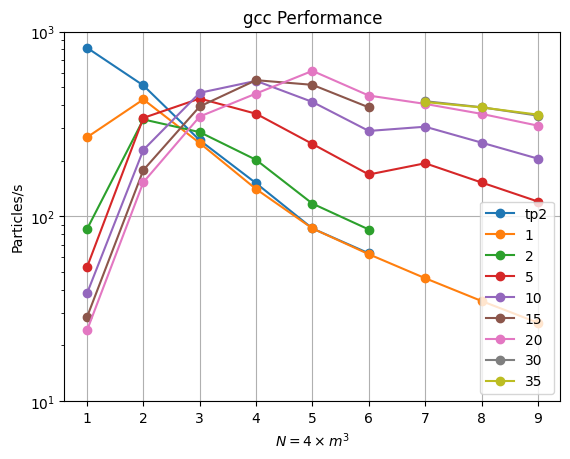

In [ ]:
plot(df_combined_parts, 'gcc', metric='particulas/s', ylabel='Particles/s')

[1. 2. 3. 4. 5. 6.]
[1. 2. 3. 4. 5. 6. 7. 8. 9.]
[1. 2. 3. 4. 5. 6.]
[1. 2. 3. 4. 5. 6. 7. 8. 9.]
[1. 2. 3. 4. 5. 6. 7. 8. 9.]
[1. 2. 3. 4. 5. 6.]
[1. 2. 3. 4. 5. 6. 7. 8. 9.]
[7. 8. 9.]
[7. 8. 9.]


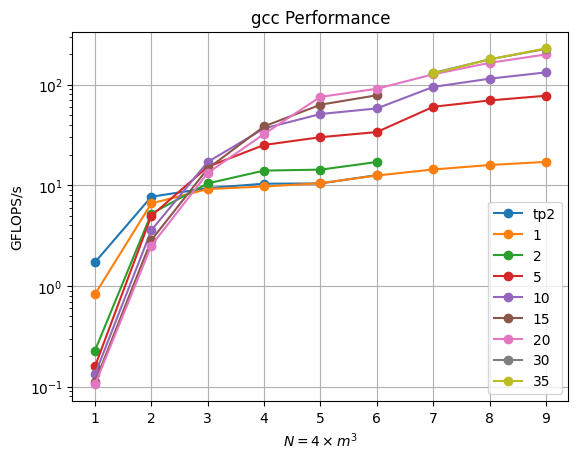

In [ ]:
plot(df_combined_gflops, 'gcc', metric='gflops/s', ylabel='GFLOPS/s')

# lab4

In [ ]:
# path="/content/20250515T074727.csv"
df_tp2 = pd.read_csv("https://raw.githubusercontent.com/lucianozablocki/tiny_md/refs/heads/tp2-single-precision/results/tp2-results.csv")
df_tp2['gflops/s'] = (df_tp2['GFLOPS']/(10**9))/df_tp2['time']

df_tp3 = pd.read_csv("https://raw.githubusercontent.com/lucianozablocki/tiny_md/refs/heads/tp3/results/tp3-results.csv")
# df_tp3_part2 = pd.read_csv("https://raw.githubusercontent.com/lucianozablocki/tiny_md/refs/heads/tp3/results/atom-parallel-extended.csv")
df_tp3['gflops/s'] = (df_tp3['GFLOPS']/(10**9))/df_tp3['time']
df_tp3['flops/byte'] =  (df_tp3['GFLOPS'])/(df_tp3['l1 misses']*df_tp3['dtlb misses']*64)
# df_tp3_part2['gflops/s'] = (df_tp3_part2['GFLOPS']/(10**9))/df_tp3_part2['time']
# df_tp3_part2['flops/byte'] =  (df_tp3_part2['GFLOPS'])/(df_tp3_part2['l1 misses']*df_tp3_part2['dtlb misses']*64)
df_tp2["threads num"] = 'tp2'
df_combined = pd.concat([df_tp3, df_tp2])
df_combined_parts = df_combined.groupby(['N', 'opt', 'compiler', 'threads num'])['particulas/s'].max().reset_index()
df_combined_gflops = df_combined.groupby(['N', 'opt', 'compiler', 'threads num'])['gflops/s'].max().reset_index()

[1. 2. 3. 4. 5. 6. 7. 8. 9.]
[1. 2. 3. 4. 5. 6. 7. 8. 9.]
[1. 2. 3. 4. 5. 6. 7. 8. 9.]
[1. 2. 3. 4. 5. 6. 7. 8. 9.]
[1. 2. 3. 4. 5. 6. 7. 8. 9.]
[1. 2. 3. 4. 5. 6. 7. 8. 9.]
[1. 2. 3. 4. 5. 6. 7. 8. 9.]
[1. 2. 3. 4. 5. 6. 7. 8. 9.]


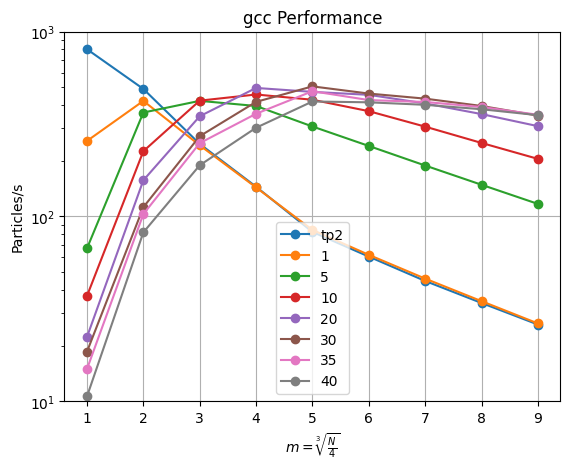

In [ ]:
plot(df_combined_parts, 'gcc', metric='particulas/s', ylabel='Particles/s')

[1. 2. 3. 4. 5. 6. 7. 8. 9.]
[1. 2. 3. 4. 5. 6. 7. 8. 9.]
[1. 2. 3. 4. 5. 6. 7. 8. 9.]
[1. 2. 3. 4. 5. 6. 7. 8. 9.]
[1. 2. 3. 4. 5. 6. 7. 8. 9.]
[1. 2. 3. 4. 5. 6. 7. 8. 9.]
[1. 2. 3. 4. 5. 6. 7. 8. 9.]
[1. 2. 3. 4. 5. 6. 7. 8. 9.]


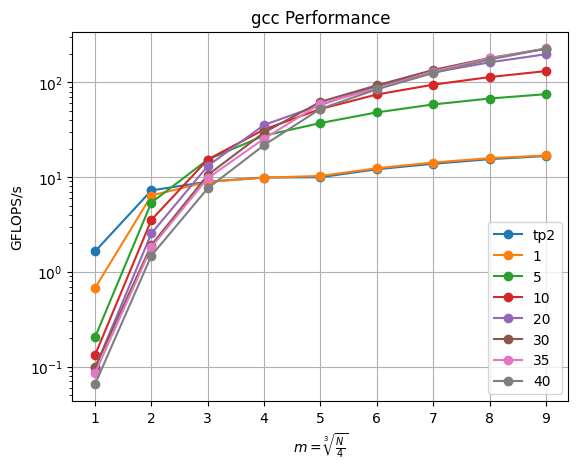

In [ ]:
plot(df_combined_gflops, 'gcc', metric='gflops/s', ylabel='GFLOPS/s')

In [ ]:
tp2improve_vs_tp3 = compare_perf_threads(
  "https://raw.githubusercontent.com/lucianozablocki/tiny_md/refs/heads/tp2-single-precision/results/tp2-results.csv",
  "https://raw.githubusercontent.com/lucianozablocki/tiny_md/refs/heads/tp3/results/tp3-results.csv",
  'particulas/s'
)

In [ ]:
pretty = pretty_show(tp2improve_vs_tp3[tp2improve_vs_tp3['threads num']==40], "particulas/s", "particulas/s lab2", "particulas/s lab3")
pretty

,N,compiler,particulas/s lab2,threads num,particulas/s lab3,ratio
6,4,clang,769.40,40,9.35,0.01x
13,4,gcc,802.32,40,10.61,0.01x
20,4,icc,402.00,40,8.72,0.02x
27,32,clang,489.28,40,58.20,0.12x
34,32,gcc,489.02,40,81.90,0.17x
41,32,icc,97.49,40,44.71,0.46x
48,108,clang,244.56,40,175.32,0.72x
55,108,gcc,246.49,40,188.94,0.77x
62,108,icc,53.84,40,82.38,1.53x
69,256,clang,118.29,40,279.71,2.36x


In [ ]:
# path="/content/20250515T074727.csv"
df_tp3 = pd.read_csv("https://raw.githubusercontent.com/lucianozablocki/tiny_md/refs/heads/tp3/results/tp3-results-bigN.csv")
# df_tp3['gflops/s'] = (df_tp3['GFLOPS']/(10**9))/df_tp2['time']

df_tp4_2080 = pd.read_csv("https://raw.githubusercontent.com/lucianozablocki/tiny_md/refs/heads/tp4/results/tp4-2080-results.csv")
df_tp4_titanx = pd.read_csv("https://raw.githubusercontent.com/lucianozablocki/tiny_md/refs/heads/tp4/results/tp4-titanx-results.csv")
# df_tp3_part2 = pd.read_csv("https://raw.githubusercontent.com/lucianozablocki/tiny_md/refs/heads/tp3/results/atom-parallel-extended.csv")
# df_tp4['gflops/s'] = (df_tp['GFLOPS']/(10**9))/df_tp3['time']
# df_tp3['flops/byte'] =  (df_tp3['GFLOPS'])/(df_tp3['l1 misses']*df_tp3['dtlb misses']*64)
# df_tp3_part2['gflops/s'] = (df_tp3_part2['GFLOPS']/(10**9))/df_tp3_part2['time']
# df_tp3_part2['flops/byte'] =  (df_tp3_part2['GFLOPS'])/(df_tp3_part2['l1 misses']*df_tp3_part2['dtlb misses']*64)
df_tp4_2080["threads num"] = 'tp4 RTX 2080 Ti'
df_tp4_titanx["threads num"] = 'tp4 Titan Xp'
df_combined = pd.concat([df_tp3, df_tp4_2080, df_tp4_titanx])
df_combined_parts = df_combined.groupby(['N', 'opt', 'compiler', 'threads num'])['particulas/s'].max().reset_index()
# df_combined_gflops = df_combined.groupby(['N', 'opt', 'compiler', 'threads num'])['gflops/s'].max().reset_index()

[10. 11. 12. 13. 14. 15. 16. 17. 18. 19.]
[10. 11. 12. 13. 14. 15. 16. 17. 18. 19.]
[10. 11. 12. 13. 14. 15. 16. 17. 18. 19.]
[10. 11. 12. 13. 14. 15. 16. 17. 18. 19.]
[10. 11. 12. 13. 14. 15. 16. 17. 18. 19.]


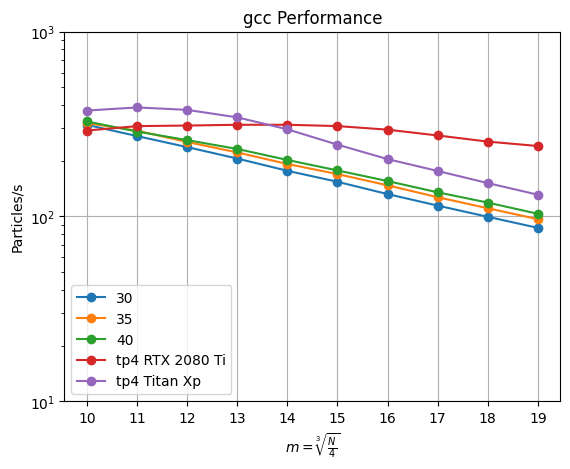

In [ ]:
plot(df_combined_parts, 'gcc', metric='particulas/s', ylabel='Particles/s')

In [ ]:
tp3_vs_tp4 = compare_perf_threads(
  "https://raw.githubusercontent.com/lucianozablocki/tiny_md/refs/heads/tp3/results/tp3-results-bigN.csv",
  "https://raw.githubusercontent.com/lucianozablocki/tiny_md/refs/heads/tp4/results/tp4-2080-results.csv",
  'particulas/s'
)
pretty = pretty_show(tp3_vs_tp4[tp3_vs_tp4['threads num']==40], "particulas/s", "particulas/s lab3", "particulas/s lab4 RTX 2080 Ti")
pretty

,N,compiler,threads num,particulas/s lab3,particulas/s lab4 RTX 2080 Ti,ratio
2,4000,clang,40,304.99,298.52,0.98x
5,4000,gcc,40,326.03,291.32,0.89x
8,5324,clang,40,274.58,310.41,1.13x
11,5324,gcc,40,287.62,307.76,1.07x
14,6912,clang,40,237.16,320.87,1.35x
17,6912,gcc,40,258.48,309.96,1.20x
20,8788,clang,40,205.66,316.30,1.54x
23,8788,gcc,40,231.52,312.95,1.35x
26,10976,clang,40,178.49,315.35,1.77x
29,10976,gcc,40,201.87,312.96,1.55x


In [ ]:
tp3_vs_tp4 = compare_perf_threads(
  "https://raw.githubusercontent.com/lucianozablocki/tiny_md/refs/heads/tp3/results/tp3-results-bigN.csv",
  "https://raw.githubusercontent.com/lucianozablocki/tiny_md/refs/heads/tp4/results/tp4-titanx-results.csv",
  'particulas/s'
)
pretty = pretty_show(tp3_vs_tp4[tp3_vs_tp4['threads num']==40], "particulas/s", "particulas/s lab3", "particulas/s lab4 Titan Xp")
pretty

,N,compiler,threads num,particulas/s lab3,particulas/s lab4 Titan Xp,ratio
2,4000,clang,40,304.99,35.01,0.11x
5,4000,gcc,40,326.03,373.67,1.15x
8,5324,clang,40,274.58,62.62,0.23x
11,5324,gcc,40,287.62,388.41,1.35x
14,6912,clang,40,237.16,76.08,0.32x
17,6912,gcc,40,258.48,376.82,1.46x
20,8788,clang,40,205.66,140.84,0.68x
23,8788,gcc,40,231.52,343.24,1.48x
26,10976,clang,40,178.49,283.35,1.59x
29,10976,gcc,40,201.87,295.71,1.46x


### hide

In [ ]:
# path="/content/20250515T074727.csv"
df_tp3 = pd.read_csv("https://raw.githubusercontent.com/lucianozablocki/tiny_md/refs/heads/tp3/results/tp3-results-bigN.csv")
# df_tp3['gflops/s'] = (df_tp3['GFLOPS']/(10**9))/df_tp2['time']

df_tp4 = pd.read_csv("https://raw.githubusercontent.com/lucianozablocki/tiny_md/refs/heads/tp4/results/tp4-titanx-results.csv")
# df_tp3_part2 = pd.read_csv("https://raw.githubusercontent.com/lucianozablocki/tiny_md/refs/heads/tp3/results/atom-parallel-extended.csv")
# df_tp4['gflops/s'] = (df_tp['GFLOPS']/(10**9))/df_tp3['time']
# df_tp3['flops/byte'] =  (df_tp3['GFLOPS'])/(df_tp3['l1 misses']*df_tp3['dtlb misses']*64)
# df_tp3_part2['gflops/s'] = (df_tp3_part2['GFLOPS']/(10**9))/df_tp3_part2['time']
# df_tp3_part2['flops/byte'] =  (df_tp3_part2['GFLOPS'])/(df_tp3_part2['l1 misses']*df_tp3_part2['dtlb misses']*64)
df_tp4["threads num"] = 'tp4'
df_combined = pd.concat([df_tp3, df_tp4])
df_combined_parts = df_combined.groupby(['N', 'opt', 'compiler', 'threads num'])['particulas/s'].max().reset_index()
# df_combined_gflops = df_combined.groupby(['N', 'opt', 'compiler', 'threads num'])['gflops/s'].max().reset_index()

[10. 11. 12. 13. 14. 15. 16. 17. 18. 19.]
[10. 11. 12. 13. 14. 15. 16. 17. 18. 19.]
[10. 11. 12. 13. 14. 15. 16. 17. 18. 19.]
[10. 11. 12. 13. 14. 15. 16. 17. 18. 19.]


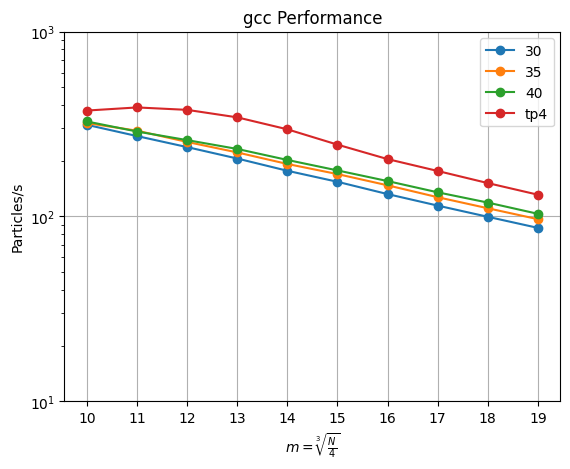

In [ ]:
plot(df_combined_parts, 'gcc', metric='particulas/s', ylabel='Particles/s')

### end hide

In [ ]:
# df_tp3_smallN = pd.read_csv("https://raw.githubusercontent.com/lucianozablocki/tiny_md/refs/heads/tp3/results/tp3-results.csv")
df_tp3_bigN = pd.read_csv("https://raw.githubusercontent.com/lucianozablocki/tiny_md/refs/heads/tp3/results/tp3-results-bigN.csv")
# df_tp3 = pd.concat([df_tp3_smallN, df_tp3_bigN])
df_tp3_bigN['gflops/s'] = (df_tp3_bigN['GFLOPS']/(10**9))/df_tp3_bigN['time']
df_grouped = df_tp3_bigN.groupby(['N', 'opt', 'compiler', 'threads num'])['GFLOPS'].max().reset_index()
df_tp4_2080 = pd.read_csv("https://raw.githubusercontent.com/lucianozablocki/tiny_md/refs/heads/tp4/results/tp4-2080-results.csv")
df_tp4_titanx = pd.read_csv("https://raw.githubusercontent.com/lucianozablocki/tiny_md/refs/heads/tp4/results/tp4-titanx-results.csv")

In [ ]:
df_tp3_grouped = df_tp3_bigN.groupby(['N', 'opt', 'compiler', 'threads num'])['gflops/s'].max().reset_index()

In [ ]:
threads_num=30
compiler='gcc'

In [ ]:
df_gflops = ((df_grouped[(df_grouped['threads num']==threads_num) & (df_grouped['compiler']==compiler)]['GFLOPS'])/(10**9)).reset_index(drop=True)
df_time = df_tp4_2080[df_tp4_2080['compiler']=='gcc']['time'].reset_index(drop=True)

In [ ]:
df_gflops

,GFLOPS
0,3526.956718
1,6211.134257
2,10435.957151
3,16817.232910
4,26201.186692
5,39585.315996
6,58235.260183
7,83735.438643
8,117927.706022
9,163042.340669


In [ ]:
df_time

,time
0,13.730365
1,17.299235
2,22.299860
3,28.081445
4,35.071719
5,43.844529
6,55.649142
7,71.752268
8,91.932279
9,114.237508


In [ ]:
df_tp4_2080_gcc = df_tp4_2080[df_tp4_2080['compiler']=='gcc'].copy()

In [ ]:
df_tp4_titanx_gcc = df_tp4_titanx[df_tp4_titanx['compiler']=='gcc'].copy()

df_time_titanx = df_tp4_titanx[df_tp4_titanx['compiler']=='gcc']['time'].reset_index(drop=True)

df_tp4_titanx_gcc['gflops/s'] = (df_gflops/df_time_titanx).values
df_tp4_titanx_gcc["threads num"] = 'tp4 Titan Xp'

In [ ]:
df_tp4_titanx_gcc

,particulas/s,N,opt,compiler,runs,threads num,GFLOPS,time,l1 misses,dtlb misses,gflops/s
10,373.667,4000,-O1 -ffast-math -ftree-vectorize -funroll-loop...,gcc,1,Titan Xp,NaN,10.704712,NaN,NaN,329.477030
11,388.414,5324,-O1 -ffast-math -ftree-vectorize -funroll-loop...,gcc,1,Titan Xp,NaN,13.707025,NaN,NaN,453.135108
12,376.821,6912,-O1 -ffast-math -ftree-vectorize -funroll-loop...,gcc,1,Titan Xp,NaN,18.342937,NaN,NaN,568.935997
13,343.238,8788,-O1 -ffast-math -ftree-vectorize -funroll-loop...,gcc,1,Titan Xp,NaN,25.603222,NaN,NaN,656.840491
14,295.715,10976,-O1 -ffast-math -ftree-vectorize -funroll-loop...,gcc,1,Titan Xp,NaN,37.116778,NaN,NaN,705.912207
15,244.300,13500,-O1 -ffast-math -ftree-vectorize -funroll-loop...,gcc,1,Titan Xp,NaN,55.259956,NaN,NaN,716.347222
16,204.027,16384,-O1 -ffast-math -ftree-vectorize -funroll-loop...,gcc,1,Titan Xp,NaN,80.303216,NaN,NaN,725.192129
17,175.974,19652,-O1 -ffast-math -ftree-vectorize -funroll-loop...,gcc,1,Titan Xp,NaN,111.675353,NaN,NaN,749.811273
18,151.345,23328,-O1 -ffast-math -ftree-vectorize -funroll-loop...,gcc,1,Titan Xp,NaN,154.137942,NaN,NaN,765.079023
19,130.934,27436,-O1 -ffast-math -ftree-vectorize -funroll-loop...,gcc,1,Titan Xp,NaN,209.540457,NaN,NaN,778.094803


In [ ]:
df_tp4_2080_gcc['gflops/s'] = (df_gflops / df_time).values

In [ ]:
df_tp4_2080_gcc["threads num"] = 'tp4 RTX 2080 Ti'

In [ ]:
df_tp4_2080_gcc

,particulas/s,N,opt,compiler,runs,threads num,GFLOPS,time,l1 misses,dtlb misses,gflops/s
10,291.325,4000,-O1 -ffast-math -ftree-vectorize -funroll-loop...,gcc,1,1,NaN,13.730365,NaN,NaN,256.872757
11,307.759,5324,-O1 -ffast-math -ftree-vectorize -funroll-loop...,gcc,1,1,NaN,17.299235,NaN,NaN,359.040978
12,309.957,6912,-O1 -ffast-math -ftree-vectorize -funroll-loop...,gcc,1,1,NaN,22.299860,NaN,NaN,467.983079
13,312.947,8788,-O1 -ffast-math -ftree-vectorize -funroll-loop...,gcc,1,1,NaN,28.081445,NaN,NaN,598.873488
14,312.959,10976,-O1 -ffast-math -ftree-vectorize -funroll-loop...,gcc,1,1,NaN,35.071719,NaN,NaN,747.074493
15,307.906,13500,-O1 -ffast-math -ftree-vectorize -funroll-loop...,gcc,1,1,NaN,43.844529,NaN,NaN,902.856454
16,294.416,16384,-O1 -ffast-math -ftree-vectorize -funroll-loop...,gcc,1,1,NaN,55.649142,NaN,NaN,1046.471843
17,273.887,19652,-O1 -ffast-math -ftree-vectorize -funroll-loop...,gcc,1,1,NaN,71.752268,NaN,NaN,1167.007552
18,253.752,23328,-O1 -ffast-math -ftree-vectorize -funroll-loop...,gcc,1,1,NaN,91.932279,NaN,NaN,1282.767134
19,240.166,27436,-O1 -ffast-math -ftree-vectorize -funroll-loop...,gcc,1,1,NaN,114.237508,NaN,NaN,1427.222490


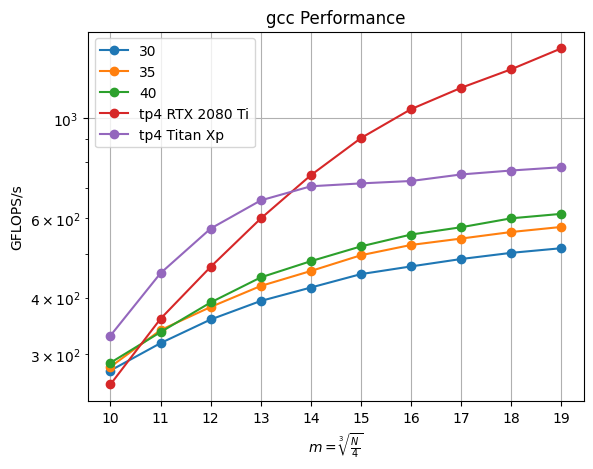

In [ ]:
df=pd.concat([df_tp3_grouped[df_grouped['compiler']=='gcc'], df_tp4_2080_gcc, df_tp4_titanx_gcc])
# compiler='gcc'
import numpy as np
metric='gflops/s'
Ns=[]
for thread_num in df['threads num'].unique():
  data = df[df['threads num'] == thread_num]
  # print(data[metric])
  # data=df
  # compute Ns in here, as each experiment (where experiment = num of threads)
  # could have different amount of data points
  # print(thread_num)
  Ns=np.cbrt(data["N"].unique()/4)
  # print(Ns)
  # print(data)
  # if len(Ns) == len(data[metric]):
  # threads num can be either the num of threads, or tp2
  # it could be better named as "variant"
  plt.plot(Ns, data[metric], 'o-', label=int(thread_num) if type(thread_num)==int else thread_num)

plt.title(f'gcc Performance')
plt.xlabel(r'$m=\sqrt[3]{\frac{N}{4}}$') # N = 4 \times m^3
plt.ylabel('GFLOPS/s')
plt.xticks(Ns)
if metric=='particulas/s':
  plt.ylim(bottom=10**1, top=10**3)
plt.yscale('log')
plt.legend()
plt.grid(True)

In [ ]:
# import pandas as pd
# import matplotlib.pyplot as plt

def compare_perf_threads_v2(baseline, improved, metric):

  df1 = pd.read_csv(baseline)
  # threads = pd.read_csv(improved)

  # Load the two CSV files


  # max particulas/s for each (N, compiler)
  max_df1 = df1.groupby(['N', 'compiler', 'threads num'])[metric].max().reset_index()
  max_df2 = improved

  # Merge the two DataFrames to align the same (N, compiler) pairs
  merged = pd.merge(
      max_df1,
      max_df2,
      on=['N', 'compiler'],
      suffixes=('_1', '_2')
  )

  # Compute the ratio (N2 / N1)
  merged['ratio'] = merged[f'{metric}_2'] / merged[f'{metric}_1']

  # # Print the results
  # merged[['N', 'compiler', f'{metric}_1', f'{metric}_2', 'ratio']]
  return merged


In [ ]:
tp3_vs_tp4_gflops = compare_perf_threads_v2(
  df_tp3_bigN['gflops/s'] = (df_tp3_bigN['GFLOPS']/(10**9))/df_tp3_bigN['time']
,
  df_tp4_2080_gcc,
  'gflops/s'
)


KeyError: 'Column not found: gflops/s'

# end lab4

## gflops/s

In [ ]:
path="/content/20250515T125530.csv"
df_gflops = pd.read_csv(path)

In [ ]:
df_gflops['gflops/s'] = (df_gflops['GFLOPS']/(10**9))/df_gflops['time']

NameError: name 'df_gflops' is not defined

In [ ]:
df_gflops

,particulas/s,N,opt,compiler,runs,threads num,GFLOPS,time,gflops/s
0,15.694,4,-O1 -ffast-math -ftree-vectorize -funroll-loop...,icc,30,20,9810372,0.259,0.037878
1,11.001,4,-O1 -ffast-math -ftree-vectorize -funroll-loop...,icc,30,20,9810372,0.367,0.026731
2,12.166,4,-O1 -ffast-math -ftree-vectorize -funroll-loop...,icc,30,20,9810372,0.332,0.029549
3,16.170,4,-O1 -ffast-math -ftree-vectorize -funroll-loop...,icc,30,20,9810372,0.250,0.039241
4,15.076,4,-O1 -ffast-math -ftree-vectorize -funroll-loop...,icc,30,20,9810372,0.268,0.036606
...,...,...,...,...,...,...,...,...,...
310,468.282,864,-O1 -ffast-math -ftree-vectorize -funroll-loop...,gcc,5,20,174512365403,1.849,94.382026
311,458.903,864,-O1 -ffast-math -ftree-vectorize -funroll-loop...,gcc,5,20,174513518754,1.887,92.481992
312,459.168,864,-O1 -ffast-math -ftree-vectorize -funroll-loop...,gcc,5,20,174513467029,1.886,92.531001
313,446.378,864,-O1 -ffast-math -ftree-vectorize -funroll-loop...,gcc,5,20,174513639139,1.940,89.955484


In [ ]:
df_max = df_gflops.groupby(['N', 'opt', 'compiler', 'threads num'])['gflops/s'].max().reset_index()

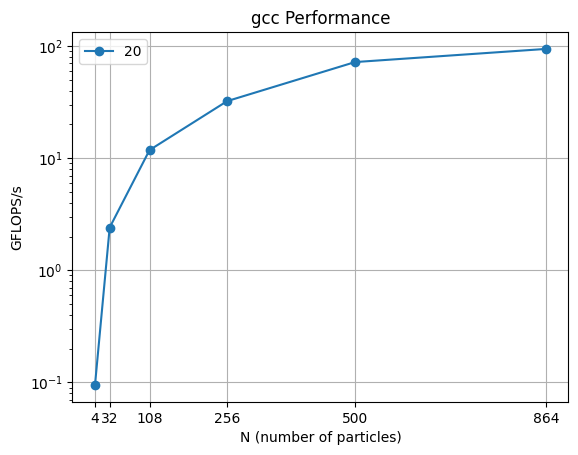

In [ ]:
plot(df_max, 'gcc', metric='gflops/s', ylabel='GFLOPS/s')

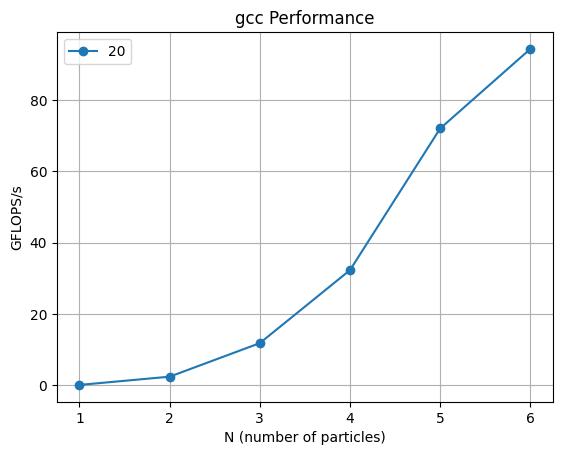

In [ ]:
plot(df_max, 'gcc', metric='gflops/s', ylabel='GFLOPS/s')

## roofline

In [ ]:
# SGEMM: https://youtu.be/vbIHAnSJD2w?t=67
TFLOPS=2.355412
time=29.875342
# STREAM: https://youtu.be/vbIHAnSJD2w?t=102
MBs=34834.6

In [ ]:
# df_combined_parts = df_combined.groupby(['N', 'opt', 'compiler', 'threads num'])['particulas/s'].max().reset_index()
idx = df_tp3.groupby(['N', 'opt', 'compiler', 'threads num'])['gflops/s'].idxmax()

# Step 2: Use these indices to extract full rows from the original DataFrame
df_max_full_rows = df_tp3.loc[idx].reset_index(drop=True)

In [ ]:
points=df_max_full_rows[(df_max_full_rows['threads num']==20) & (df_max_full_rows['compiler']=='gcc')]

In [ ]:
points

,particulas/s,N,opt,compiler,runs,threads num,GFLOPS,time,l1 misses,dtlb misses,gflops/s,flops/byte
11,24.116,4,-O1 -ffast-math -ftree-vectorize -funroll-loop...,gcc,30,20,17693147,0.168,13980482,9889,0.105316,0.000002
29,152.950,32,-O1 -ffast-math -ftree-vectorize -funroll-loop...,gcc,25,20,533966590,0.212,12920741,11354,2.518710,0.000057
47,341.821,108,-O1 -ffast-math -ftree-vectorize -funroll-loop...,gcc,20,20,4228578075,0.319,41118568,12916,13.255731,0.000124
65,461.781,256,-O1 -ffast-math -ftree-vectorize -funroll-loop...,gcc,15,20,18014396410,0.557,57482700,31379,32.341825,0.000156
83,612.526,500,-O1 -ffast-math -ftree-vectorize -funroll-loop...,gcc,10,20,61958146410,0.820,119559296,39728,75.558715,0.000204
101,450.205,864,-O1 -ffast-math -ftree-vectorize -funroll-loop...,gcc,5,20,174783886917,1.922,314022790,105099,90.938547,0.000083


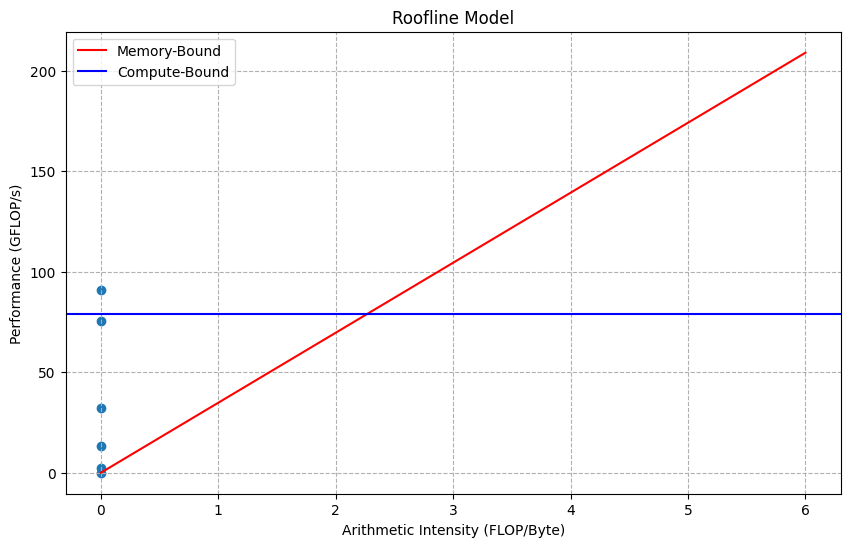

In [ ]:
import numpy as np
# System parameters (replace with your actual values)
memory_bandwidth = MBs / 10**3  # MB/s → in GBytes/s
peak_flops = ((TFLOPS*10**3) / time) # GFLOP/s

# Generate arithmetic intensity range
ai = np.linspace(0, 6, 100)  # From 0.1 to 100 FLOP/Byte

# Compute memory-bound performance
memory_bound_perf = memory_bandwidth * ai

# # Compute compute-bound performance (capped at peak_flops)
# compute_bound_perf = np.minimum(memory_bound_perf, peak_flops)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(ai, memory_bound_perf, 'r-', label="Memory-Bound")  # Diagonal
plt.axhline(y=peak_flops, color='b', linestyle='-', label="Compute-Bound")  # Horizontal
plt.xlabel("Arithmetic Intensity (FLOP/Byte)")
plt.ylabel("Performance (GFLOP/s)")
plt.title("Roofline Model")
plt.legend()
plt.scatter(points['flops/byte'],points['gflops/s'])
plt.grid(True, which="both", ls="--")
plt.show()

## compare for bigger Ns

In [ ]:
df_tp3 = pd.read_csv("https://raw.githubusercontent.com/lucianozablocki/tiny_md/refs/heads/tp3/results/atom-parallel.csv")
df_tp3_part2 = pd.read_csv("https://raw.githubusercontent.com/lucianozablocki/tiny_md/refs/heads/tp3/results/atom-parallel-extended.csv")
df_tp3['gflops/s'] = (df_tp3['GFLOPS']/(10**9))/df_tp3['time']
df_tp3['flops/byte'] =  (df_tp3['GFLOPS'])/(df_tp3['l1 misses']*df_tp3['dtlb misses']*64)
df_tp3_part2['gflops/s'] = (df_tp3_part2['GFLOPS']/(10**9))/df_tp3_part2['time']
df_tp3_part2['flops/byte'] =  (df_tp3_part2['GFLOPS'])/(df_tp3_part2['l1 misses']*df_tp3_part2['dtlb misses']*64)

In [ ]:
metric='particulas/s'
max_df1 = df_tp3.groupby(['N', 'compiler', 'threads num'])[metric].max().reset_index()
max_df2 = df_tp3_part2.groupby(['N', 'compiler', 'threads num'])[metric].max().reset_index()


In [ ]:
for thread_num in max_df2['threads num'].unique():
    # data1 = max_df1[(max_df1['compiler'] == 'gcc') & (max_df1['threads num'] == thread
    print(thread_num)
    # print(max_df2[(max_df2["compiler"]=='gcc') & (max_df2["threads num"]==35)][metric])
    # print(max_df2[(max_df2["compiler"]=='gcc') & (max_df2["threads num"]==thread_num)][metric])
    metric_base = max_df2[(max_df2["compiler"]=='gcc') & (max_df2["threads num"]==30)][metric]
    to_compare = max_df2[(max_df2["compiler"]=='gcc') & (max_df2["threads num"]==thread_num)][metric]
    print(metric_base.values/to_compare.values)
    # print(to_compare)
    # print(metric_base/to_compare)
    # print(f'ratio: {ratio}']

1
[ 9.08786938 11.2178721  13.24847732]
5
[2.16684394 2.55977359 2.91829462]
10
[1.37463684 1.55662636 1.71090416]
20
[1.03021401 1.08349404 1.13455165]
30
[1. 1. 1.]
35
[1.01102113 1.00137558 0.98652538]


In [ ]:
max_df2[(max_df2["compiler"]=='gcc') & (max_df2["threads num"]==35)]

,N,compiler,threads num,particulas/s
11,1372,gcc,35,415.297
29,2048,gcc,35,388.363
47,2916,gcc,35,355.034


In [ ]:
max_df2[(max_df2["compiler"]=='gcc') & (max_df2["threads num"]==1)]

,N,compiler,threads num,particulas/s
6,1372,gcc,1,46.243
24,2048,gcc,1,34.822
42,2916,gcc,1,26.538
